IMPORTING LIBRARIES

In [4]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

LOADING DATASET

In [5]:
df = pd.read_csv('/content/drive/MyDrive/projects data sets ml/advertising.csv')

In [6]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [7]:
df.shape

(200, 4)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [10]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


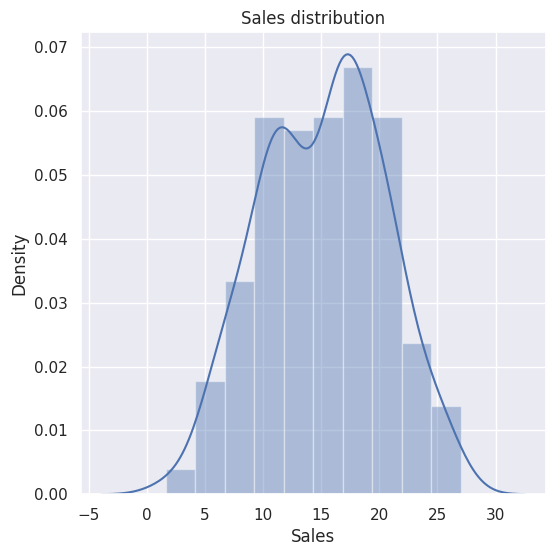

In [12]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['Sales'])
plt.title('Sales distribution')
plt.show()

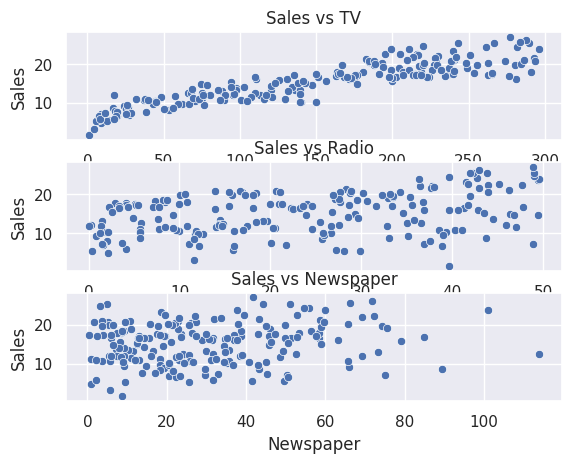

In [15]:
attributes = ['TV', 'Radio', 'Newspaper']

fig, axes = plt.subplots(3, 1)

for i, attr in enumerate(attributes):
    sns.scatterplot(data=df, x=attr, y='Sales', ax=axes[i])

    axes[i].set_title(f'Sales vs {attr}')
plt.show()

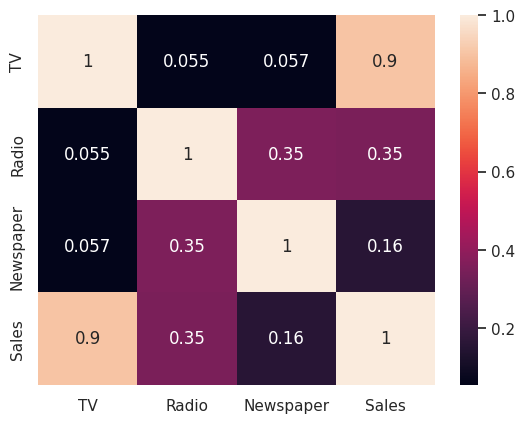

In [16]:
sns.heatmap(df.corr(), annot = True)
plt.show()

**OUTLIER** **ANALYSIS**

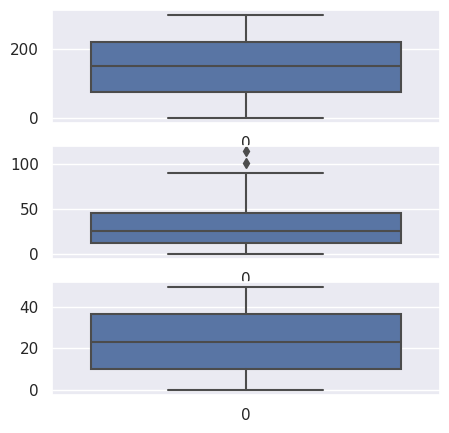

In [20]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['Radio'], ax = axs[2])

In [21]:
def call_out(df):
    lst=df.select_dtypes(exclude='object').columns.tolist()
    for i in lst:
        if i != 'sales':
            df=outlier(df,df[i])
    return df
    #Function to remove attribute
def outlier(df,data_column):
    from scipy.stats import skew
    import statistics

    qi=data_column.quantile(0.25)
    qf=data_column.quantile(0.75)
    iqr=qf-qi
    c=1.5
    #Calculate upper and lower limit for outlier detection
    upper_limit=qf+c*iqr
    lower_limit=qi-c*iqr

    arr=data_column.to_numpy()
    med=statistics.median(arr)

    for i in data_column:
        if((i<lower_limit) | (i>upper_limit)):
            data_column=data_column.replace(i,med)
    return df

df = call_out(df = df)

**MODEL** **TRANING**

In [22]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Training MAE:", train_mae.round(3))
print("Testing MAE:", test_mae.round(3))
print("Training R2 score:", train_r2.round(3))
print("Testing R2 score:", test_r2.round(3))

Training MAE: 1.234
Testing MAE: 1.275
Training R2 score: 0.9
Testing R2 score: 0.906


**Building Predictive Model**

In [28]:
input_data = (230.1,	37.8,	69.2	)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

[21.37254028]
